In [93]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## OLS Linear Regression
import statsmodels.api as sm

### Data Loading

In [61]:
# Import Data from CSV file
df=pd.read_csv("economic_index.csv")

### Data Profiling

In [62]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [63]:
df.tail()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
19,19,2016,5,1.75,6.1,866
20,20,2016,4,1.75,5.9,876
21,21,2016,3,1.75,6.2,822
22,22,2016,2,1.75,6.2,704
23,23,2016,1,1.75,6.1,719


In [64]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [65]:
df.shape

(24, 6)

In [66]:
df.dtypes

Unnamed: 0             int64
year                   int64
month                  int64
interest_rate        float64
unemployment_rate    float64
index_price            int64
dtype: object

In [67]:
df.nunique()

Unnamed: 0           24
year                  2
month                12
interest_rate         5
unemployment_rate    10
index_price          24
dtype: int64

In [68]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### Data Cleaning Steps

In [69]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

### Data Visualization

In [70]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


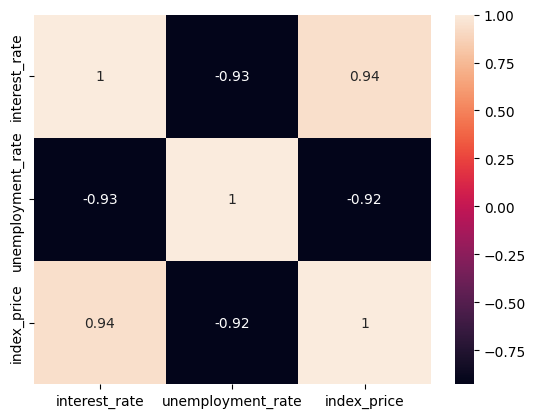

In [71]:
sns.heatmap(df.corr(),annot=True)
plt.show()

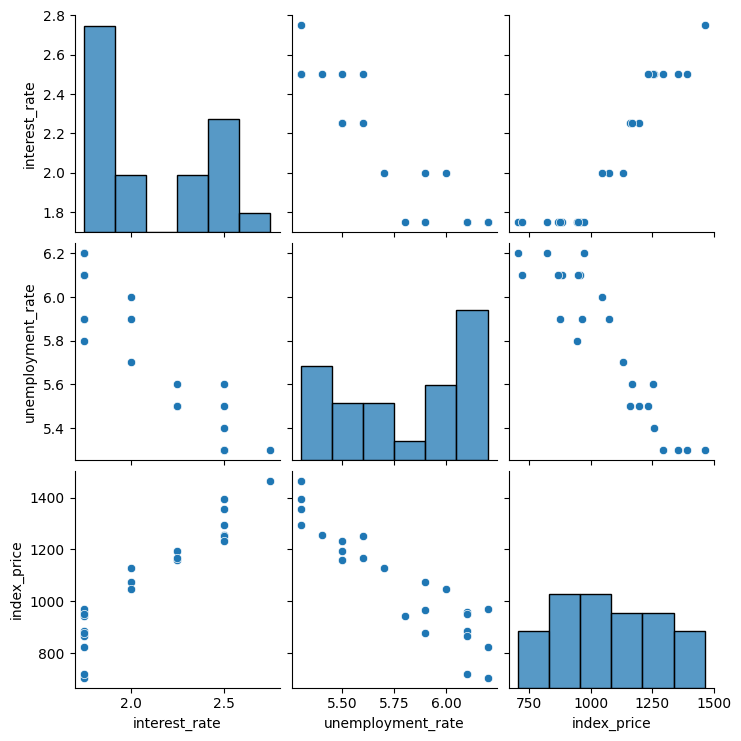

In [72]:
sns.pairplot(df)
plt.show()

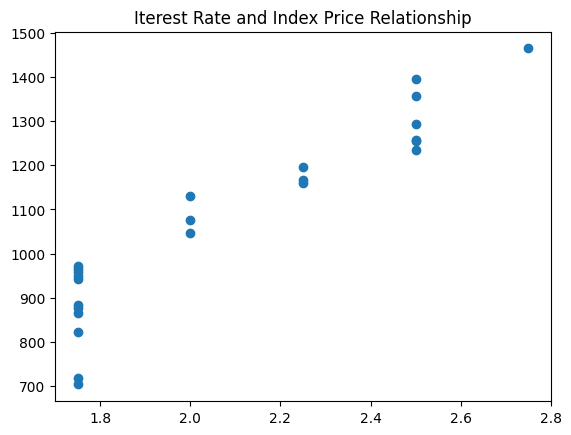

In [73]:
plt.scatter(df['interest_rate'],df['index_price'])
plt.title("Iterest Rate and Index Price Relationship")
plt.show()

### Independent and Dependant Features

In [74]:
X=df[['interest_rate','index_price']]
y=df[['unemployment_rate']]

In [75]:
X.head()

,interest_rate,index_price
0,2.75,1464
1,2.50,1394
2,2.50,1357
3,2.50,1293
4,2.50,1256


In [76]:
y.head()

,unemployment_rate
0,5.3
1,5.3
2,5.3
3,5.3
4,5.4


### Train-Test Split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

### Scaling

In [78]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [79]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Cross Validation

In [80]:
validation_score=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [81]:
validation_score

array([-0.01876976, -0.01854254, -0.01390326])

In [82]:
np.mean(validation_score)

np.float64(-0.017071853914476246)

### Prediction

In [83]:
y_pred=regressor.predict(X_test)

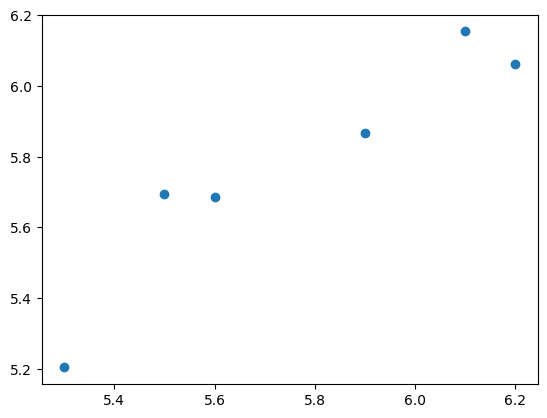

In [84]:
plt.scatter(y_test,y_pred)
plt.show()

In [85]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,y_pred)

print(mse)
print(mae)
print(rmse)
print(r2score)

0.012998225436879583
0.10049352259486859
0.11400976027024871
0.8768589169137724


In [86]:
residuals=y_test-y_pred
print(residuals)

    unemployment_rate
8           -0.194858
16           0.139284
0            0.095969
18          -0.053642
11           0.032894
9           -0.086313


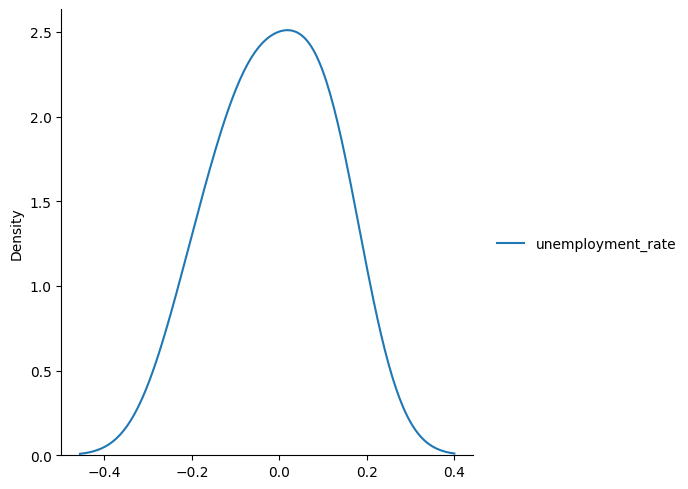

In [87]:
sns.displot(residuals,kind='kde')
plt.show()

### Ordinary Least Square

In [89]:
model=sm.OLS(y_train,X_train).fit()

In [90]:
model.summary()

d:\Projects\ML_Practice_Projects\dataSceince_ML_NLP_Practice\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      unemployment_rate   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.122
Method:                 Least Squares   F-statistic:                            0.02224
Date:                Tue, 10 Sep 2024   Prob (F-statistic):                       0.978
Time:                        10:50:52   Log-Likelihood:                         -57.116
No. Observations:                  18   AIC:                                      118.2
Df Residuals:                      16   BIC:                                      120.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1143      3.783     -0.030      0.976      -8.135       7.906
x2            -0.1960      3.783     -0.052      0.959      -8.216       7.824
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.784
Skew:                           0.231   Prob(JB):                        0.676
Kurtosis:                       2.088   Cond. No.                         5.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
print(regressor.coef_)

[[-0.11425197 -0.19597746]]
